## Link to GIT repository with the .ipynb file: https://github.com/rgouaz/HW5_Privacy/

In [ ]:
!pip install anonypy

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the heart dataset
df = pd.read_csv('heart.csv')

# Splitting the heart dataset
X_heart = df.drop('target', axis=1)
y_heart = df['target']
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.1, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import anonypy

# For the heart dataset
X_train_heart_with_target = pd.concat([X_train_heart, y_train], axis=1)

# Convert necessary columns to categorical
categorical_columns_heart = []
for column in categorical_columns_heart:
    X_train_heart_with_target[column] = X_train_heart_with_target[column].astype('category')

feature_columns_heart = list(X_train_heart.columns)  # Using all columns as features for demonstration
sensitive_column_heart = 'target'

# Using the Preserver object
p_heart = anonypy.Preserver(X_train_heart_with_target, feature_columns_heart, sensitive_column_heart)
k_anonymized_heart = p_heart.anonymize_k_anonymity(k=2)


In [ ]:
import anonypy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Function to train and evaluate
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

def average_range(value):
    if isinstance(value, str) and "-" in value:
        low, high = map(float, value.split("-"))
        return (low + high) / 2
    return value

In [ ]:
# List to store MSE for each k
mses_heart = []

for k in range(2, 100):
    # Apply k-anonymity on the data
    X_train_heart_with_target = pd.concat([X_train_heart, y_train], axis=1)
    for column in categorical_columns_heart:
        X_train_heart_with_target[column] = X_train_heart_with_target[column].astype('category')

    p_heart = anonypy.Preserver(X_train_heart_with_target, feature_columns_heart, sensitive_column_heart)
    k_anonymized_data_heart = p_heart.anonymize_k_anonymity(k=k)

    # Convert the anonymized data back to DataFrame
    df_anonymized_heart = pd.DataFrame(k_anonymized_data_heart)

    # Convert range values to their average
    for column in df_anonymized_heart.columns:
        df_anonymized_heart[column] = df_anonymized_heart[column].apply(average_range)

    # Expand the dataset based on the count for each row
    replicated_rows = []
    for idx, row in df_anonymized_heart.iterrows():
        count = int(row['count'])
        replicated_rows.extend([row] * count)
    df_expanded_heart = pd.DataFrame(replicated_rows).drop(columns=['count', 'target']).reset_index(drop=True)

    # Train a linear regression model and calculate the MSE
    mse = train_and_evaluate(df_expanded_heart, y_train.iloc[:df_expanded_heart.shape[0]], X_test_heart, y_test)
    mses_heart.append(mse)

print(mses_heart)

[0.2494666414128804, 0.26711650681778193, 0.26957246544985086, 0.2556321922479158, 0.2575226478679001, 0.24496762396342037, 0.2706904608529542, 0.29186629660916497, 0.2653378726374892, 0.2495411856168545, 0.2437450051210347, 0.24891389542900794, 0.2914621626659464, 0.3287400928024613, 0.306632023751173, 0.30092350699280773, 0.28339932960618286, 0.28293512618523403, 0.30425604855458277, 0.29265454517858114, 0.3027019727026485, 0.301892414705088, 0.3026485677262876, 0.2995431440284455, 0.3041379205431982, 0.2918219856551691, 0.27883744676734223, 0.30578254363811236, 0.3092178235783994, 0.35283094315935537, 0.35283094315935537, 0.35283094315935537, 0.3367542528562012, 0.3052696789667725, 0.30096445713484066, 0.2819726652313572, 0.2819726652313572, 0.2861459932477977, 0.2403326633589455, 0.3288483605241379, 0.2576431355565348, 0.2576431355565348, 0.31435675205878805, 0.31435675205878805, 0.2538944345504253, 0.2328262775070611, 0.23947117311582505, 0.23947117311582505, 0.23947117311582505, 

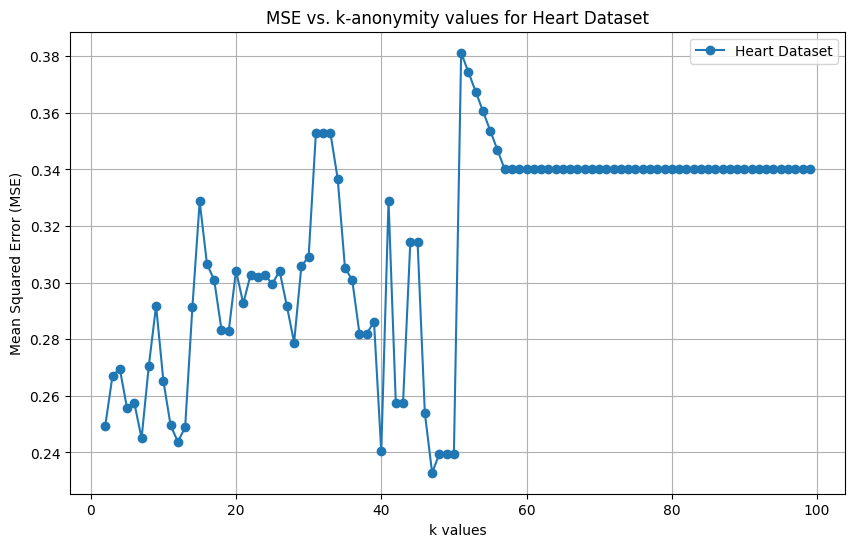

In [ ]:
import matplotlib.pyplot as plt

ks = list(range(2, 100))

plt.figure(figsize=(10,6))
plt.plot(ks, mses_heart, marker='o', label='Heart Dataset')
plt.xlabel('k values')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('MSE vs. k-anonymity values for Heart Dataset')
plt.grid(True)
plt.show()